In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler


plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_df = pd.read_csv('diamonds.csv')
data_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
data_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
data_df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

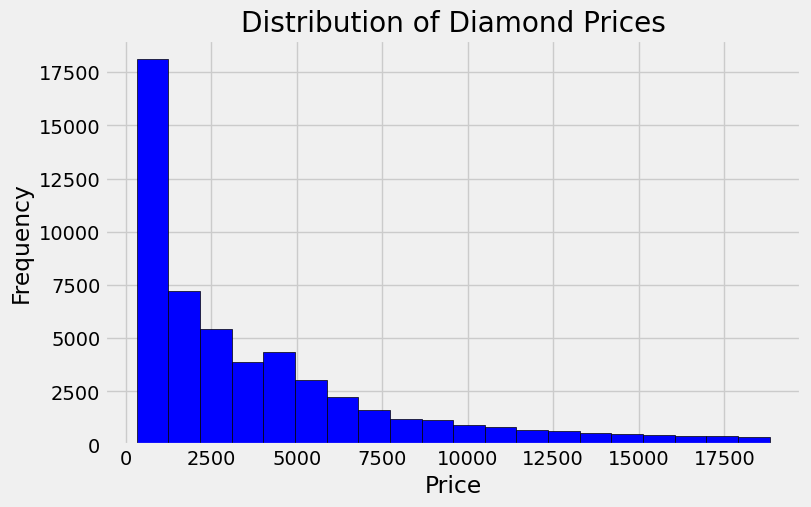

In [6]:
plt.figure(figsize=(8,5))
plt.hist(data_df['price'], bins=20, color='b', edgecolor='k');
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Prices')
plt.show()

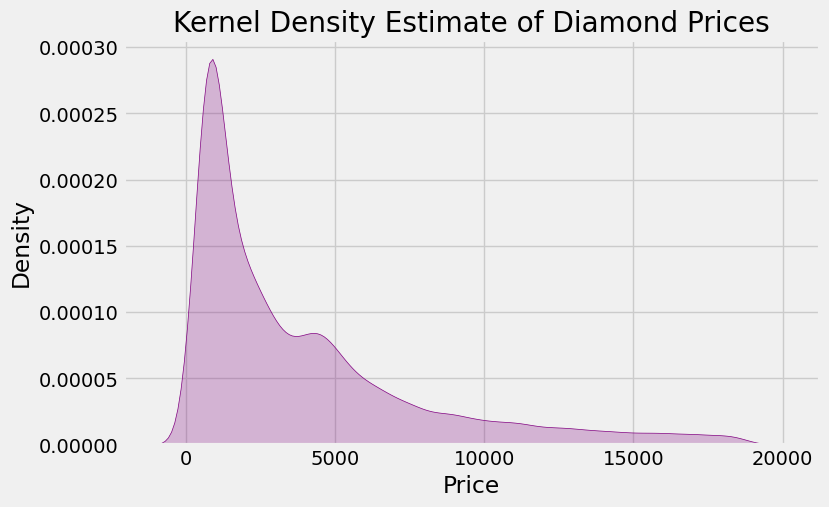

In [7]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data_df['price'], fill=True, color='purple')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Diamond Prices')
plt.show()


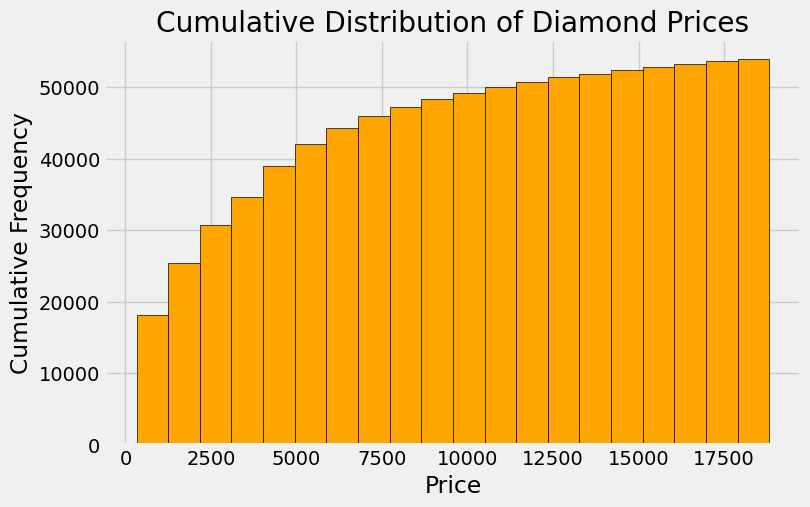

In [8]:
plt.figure(figsize=(8, 5))
plt.hist(data_df['price'], bins=20, cumulative=True, color='orange', edgecolor='k')
plt.xlabel('Price')
plt.ylabel('Cumulative Frequency')
plt.title('Cumulative Distribution of Diamond Prices')
plt.show()


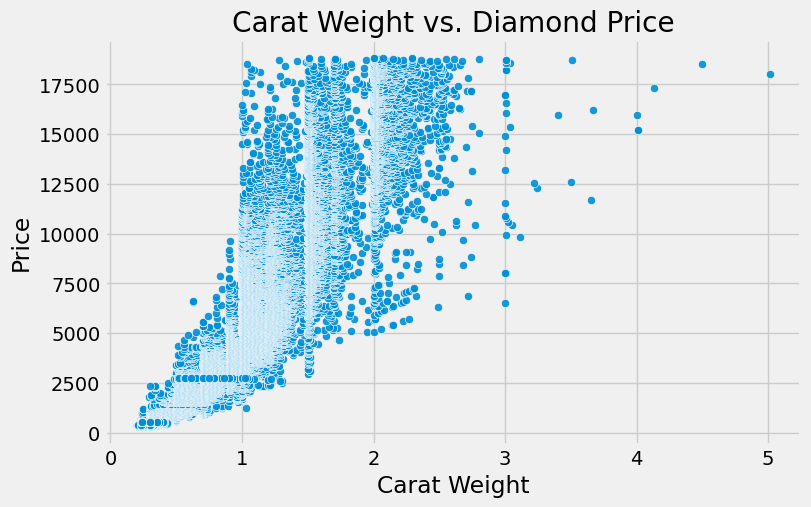

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='carat', y='price', data=data_df, alpha=0.9)
plt.xlabel('Carat Weight')
plt.ylabel('Price')
plt.title('Carat Weight vs. Diamond Price')
plt.show()

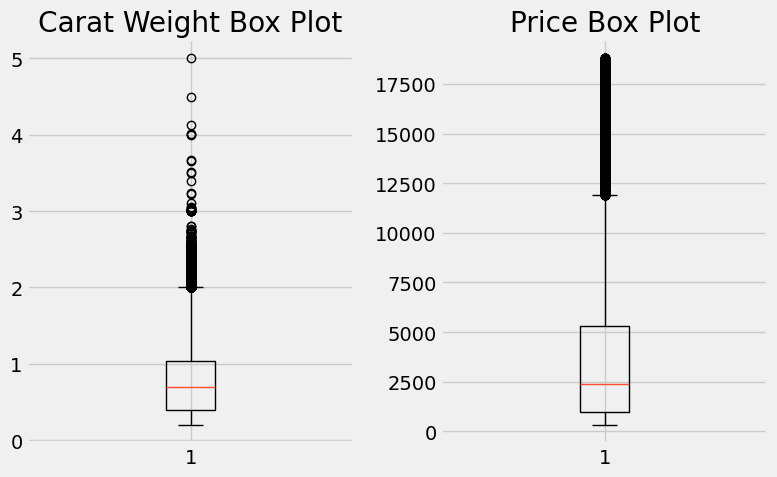

In [10]:
plt.figure(figsize=(8,5))

plt.subplot(1, 2, 1)
plt.boxplot(data_df['carat'])
plt.title('Carat Weight Box Plot')

plt.subplot(1, 2, 2)
plt.boxplot(data_df['price'])
plt.title('Price Box Plot')

plt.tight_layout()
plt.show()

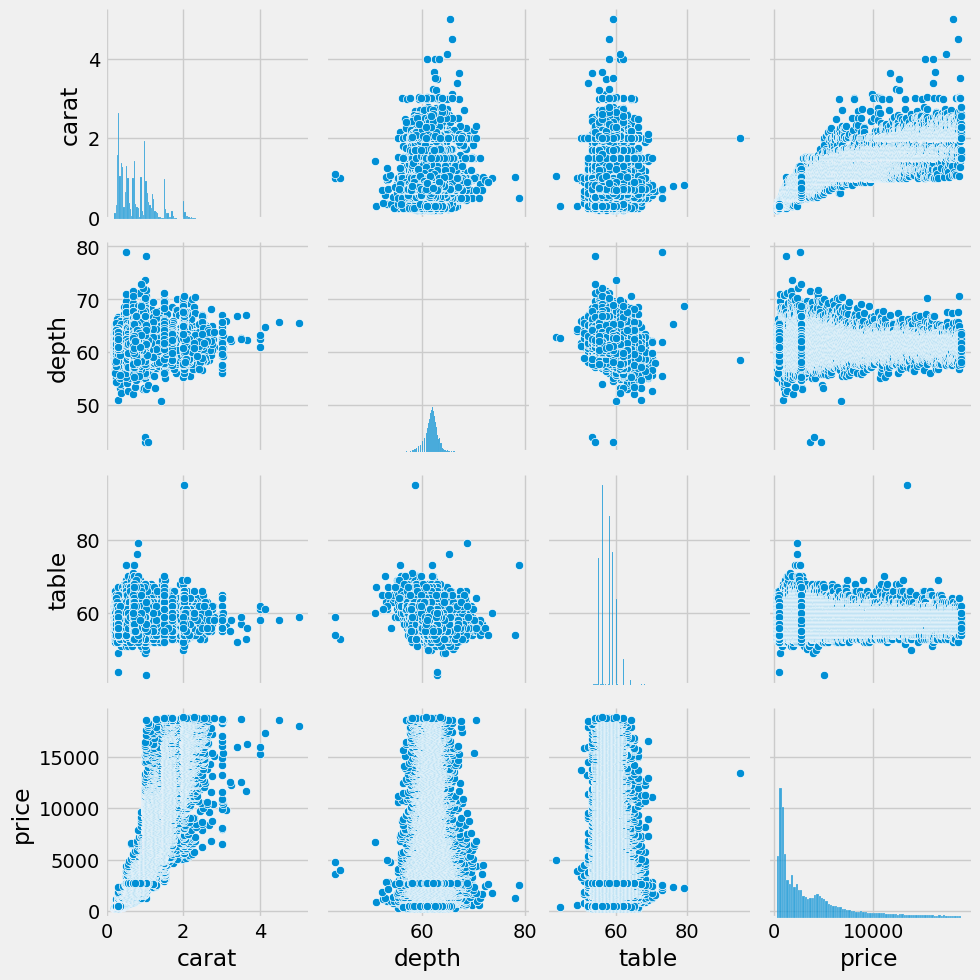

In [11]:
sns.pairplot(data_df[['carat', 'depth', 'table', 'price']])
plt.show()


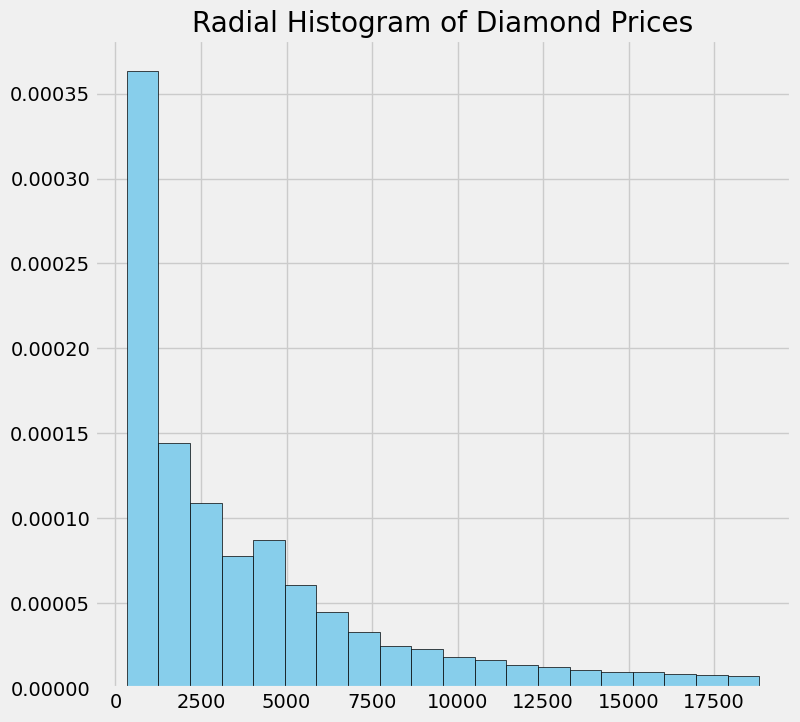

In [12]:
plt.figure(figsize=(8, 8))
plt.hist(data_df['price'], bins=20, color='skyblue', edgecolor='k', density=True)
plt.title('Radial Histogram of Diamond Prices')
plt.show()


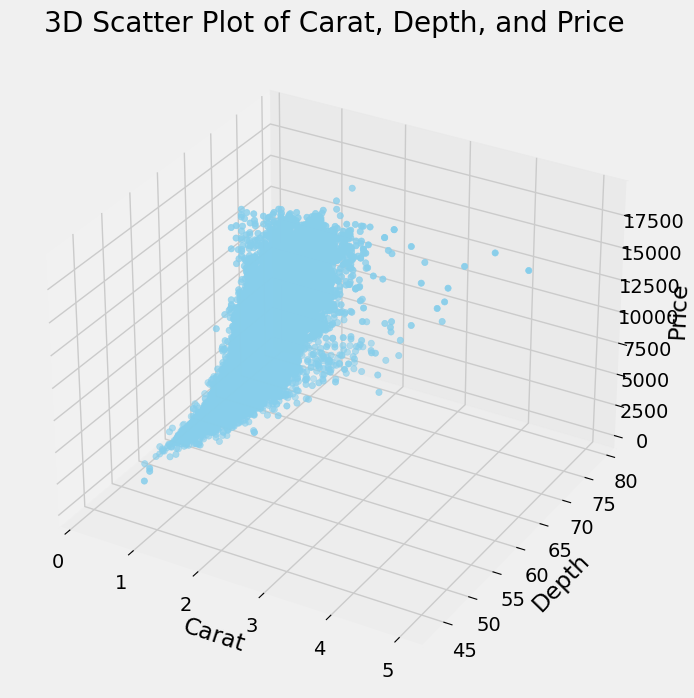

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_df['carat'], data_df['depth'], data_df['price'], c='skyblue', marker='o')

ax.set_xlabel('Carat')
ax.set_ylabel('Depth')
ax.set_zlabel('Price')
ax.set_title('3D Scatter Plot of Carat, Depth, and Price')
plt.show()


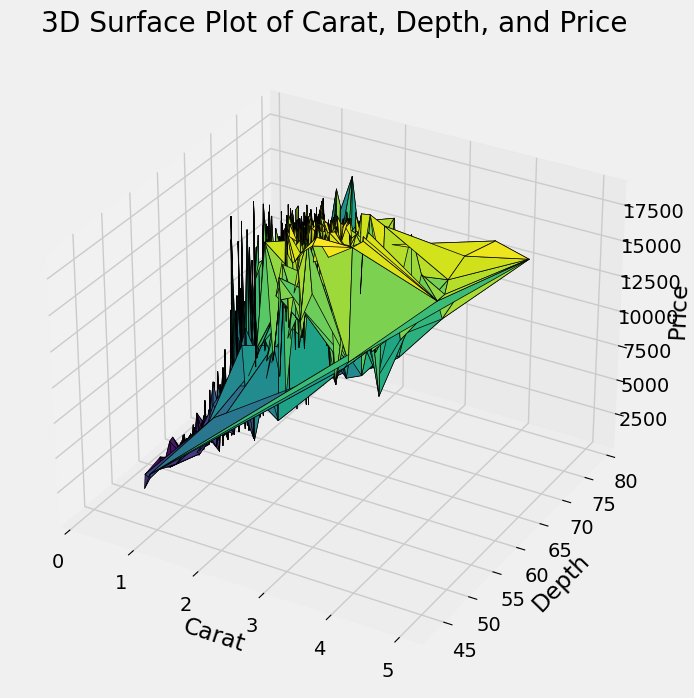

In [14]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = data_df['carat']
y = data_df['depth']
z = data_df['price']

ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='k')

ax.set_xlabel('Carat')
ax.set_ylabel('Depth')
ax.set_zlabel('Price')
ax.set_title('3D Surface Plot of Carat, Depth, and Price')
plt.show()

In [17]:
X = data_df.drop(['price'], axis=1)
y = data_df['price']

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape)

(43152, 9) (10788, 9)


In [18]:
label_encoder = LabelEncoder()

X_train['cut'] = label_encoder.fit_transform(X_train['cut'])
X_test['cut'] = label_encoder.transform(X_test['cut'])

X_train['color'] = label_encoder.fit_transform(X_train['color'])
X_test['color'] = label_encoder.transform(X_test['color'])

X_train['clarity'] = label_encoder.fit_transform(X_train['clarity'])
X_test['clarity'] = label_encoder.transform(X_test['clarity'])

In [19]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [20]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')

Mean Squared Error: 536721.87
Mean Absolute Error: 358.07
Root Mean Squared Error: 732.61
R2 Score: 0.97
